In [8]:
%config InlineBackend.figure_format = 'retina'

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
import pandas as pd
from matplotlib import ticker, cm
from pylab import rcParams
from matplotlib.colors import LogNorm

In [10]:
rcParams['figure.figsize']  = 10, 10
rcParams['axes.linewidth'] = 2

rcParams['xtick.major.size'] = 6
rcParams['xtick.major.width'] = 3
rcParams['xtick.minor.size'] = 4
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 6
rcParams['ytick.major.width'] = 3
rcParams['ytick.minor.size'] = 4
rcParams['ytick.minor.width'] = 2

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

In [11]:
df_pion  = pd.read_csv("pion2ad_test.csv")
df_eta   = pd.read_csv("eta2ad_test.csv")
df_brems = pd.read_csv("pp_bremsstrahlung.csv")
exclusion_data = np.genfromtxt('excluded.csv', delimiter=',')

In [27]:
sparsify_pion  = 2
sparsify_eta   = 1
sparsify_brems = 1

x_pion = df_pion['mass'].values[::sparsify_pion]
y_pion = df_pion['epsilon'].values[::sparsify_pion]
z_pion = df_pion['n_expected'].values[::sparsify_pion]
print(len(x_pion))
x_pion, y_pion, z_pion = x_pion[z_pion>0], y_pion[z_pion>0], z_pion[z_pion>0]

x_eta = df_eta['mass'].values[::sparsify_eta]
y_eta = df_eta['epsilon'].values[::sparsify_eta]
z_eta = df_eta['n_expected'].values[::sparsify_eta]
print(len(x_eta))
x_eta, y_eta, z_eta = x_eta[z_eta>0], y_eta[z_eta>0], z_eta[z_eta>0]

x_brems = df_brems['mass'].values[::sparsify_brems]
y_brems = df_brems['epsilon'].values[::sparsify_brems]
z_brems = df_brems['n_expected'].values[::sparsify_brems]
print(len(x_brems))
x_brems, y_brems, z_brems = x_brems[z_brems>0], y_brems[z_brems>0], z_brems[z_brems>0]

x_brems_mids = [0.5* (x_brems[i]+x_brems[i+1]) for i in range(len(x_brems)-1)]
print(x_brems, x_brems_mids)

x_excl , y_excl = exclusion_data.T[0], exclusion_data.T[1]

2000
4000
10000
[0.01 0.01 0.01 ... 3.   3.   3.  ] [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.025101010101010103, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020202020204, 0.040202020

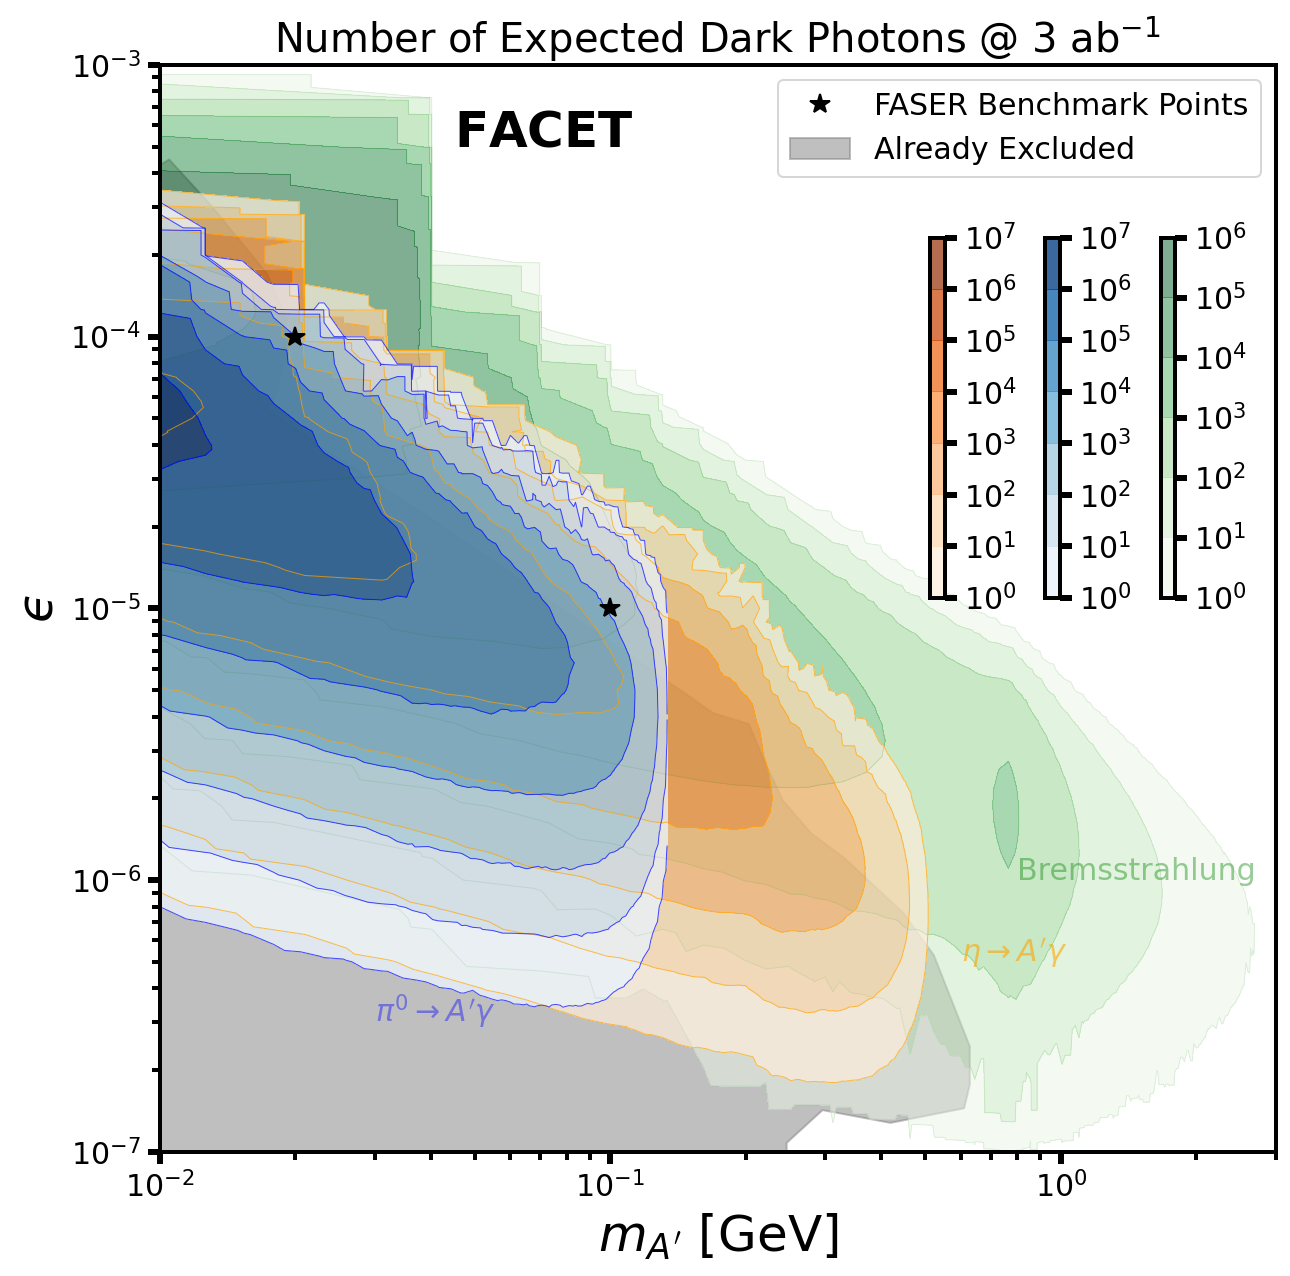

In [21]:
pion_levels  = np.array([1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5, 1e+6, 1e+7])
eta_levels   = np.array([1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5, 1e+6, 1e+7])
brems_levels = np.array([1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5, 1e+6])
#levels = np.linspace(1, 1e+5, 8)

fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.fill_between(x_excl, y_excl, 0,
                 facecolor="gray", # The fill color
                 color='gray',       # The outline color
                 alpha=0.5, label="Already Excluded") 

ax1.tricontour(x_brems, y_brems, z_brems, levels=brems_levels, linewidths=0.5, colors='green', linestyles='-', alpha=0.1)
cntr3 = plt.tricontourf(x_brems, y_brems, z_brems, levels=brems_levels, cmap='Greens', alpha=0.5, norm=LogNorm(), antialiased=False)


ax1.tricontour(x_eta, y_eta, z_eta, levels=eta_levels, linewidths=0.5, colors='orange', linestyles='-', alpha=0.7)
cntr1 = plt.tricontourf(x_eta, y_eta, z_eta, levels=eta_levels, cmap='Oranges', alpha=0.7, norm=LogNorm(), antialiased=False)

ax1.tricontour(x_pion, y_pion, z_pion, levels=pion_levels, linewidths=0.5, colors='blue', linestyles='-', alpha=0.7)
cntr2 = plt.tricontourf(x_pion, y_pion, z_pion, levels=pion_levels, cmap='Blues', alpha=0.8, norm=LogNorm(), antialiased=False)


plt.xlabel(r"$m_{A'}$ [GeV]", fontsize=25)
plt.ylabel("$ϵ$", fontsize=25)
plt.title(r'Number of Expected Dark Photons @ 3 ab$^{-1}$', fontsize=20)

plt.xscale("log")
plt.yscale("log")

plt.xlim(1e-2, 3e-0)
plt.ylim(1e-7, 1e-3)

# benchmark points
x_bm1, y_bm1 = 1e-1, 1e-5
x_bm2, y_bm2 = 2e-2, 1e-4

plt.plot(x_bm1, y_bm1, 'k*', markersize=10, label="FASER Benchmark Points")
plt.plot(x_bm2, y_bm2, 'k*', markersize=10)
plt.legend(fontsize=15)
plt.text(4.5e-2, 5e-4, r'$\mathbf{FACET}$', fontsize=25)
plt.text(6e-1, 5e-7, r'$\eta \rightarrow A^{\prime} \gamma$', fontsize=15, color='Orange', alpha=0.6)
plt.text(3e-2, 3.0e-7, r'$\pi^{0} \rightarrow A^{\prime} \gamma$', fontsize=15, color='Blue', alpha=0.4)
plt.text(8e-1, 1.0e-6, r'Bremsstrahlung', fontsize=15, color='Green', alpha=0.4)

cbax_x  = 0.66
cbaxes1 = fig.add_axes([cbax_x, 0.51, 0.01, 0.25]) 
cbaxes2 = fig.add_axes([cbax_x+0.08, 0.51, 0.01, 0.25]) 
cbaxes3 = fig.add_axes([cbax_x+2*0.08, 0.51, 0.01, 0.25]) 

plt.colorbar(cntr1, cax=cbaxes1)
plt.colorbar(cntr2, cax=cbaxes2)
plt.colorbar(cntr3, cax=cbaxes3)